In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from DL.DataLoader import MyDataloader
from DL.Engine import Engine, Model
from DL.Architecture import PriceModel

In [3]:
from pathlib import Path
import pandas as pd
import torch
from tqdm.auto import tqdm

In [4]:
path = Path(r"/mnt/Data1/Python_Projects/Pure-Python/P5/08-Advanced_Traffic_TA_Class/result/session3_final_output.csv")
seed = 42
TRAIN_PERCENT, VAL_PERCENT, TEST_PERCENT = 0.7, 0.15, 0.15
BATCH_SIZE = 32

dataloader = MyDataloader(data_path=path, 
                          train_percent=TRAIN_PERCENT,
                          val_percent=VAL_PERCENT,
                          test_percent=TEST_PERCENT,
                          batch_size=BATCH_SIZE,
                          seed=seed)

train_data, val_data, test_data = dataloader.fit()

In [5]:
len(train_data.dataset.x)

581

In [6]:
for batch, (x, y) in enumerate(train_data):
    print(batch)
    print(x.shape)
    print(y.shape)
    

0
torch.Size([32, 8])
torch.Size([32, 1])
1
torch.Size([32, 8])
torch.Size([32, 1])
2
torch.Size([32, 8])
torch.Size([32, 1])
3
torch.Size([32, 8])
torch.Size([32, 1])
4
torch.Size([32, 8])
torch.Size([32, 1])
5
torch.Size([32, 8])
torch.Size([32, 1])
6
torch.Size([32, 8])
torch.Size([32, 1])
7
torch.Size([32, 8])
torch.Size([32, 1])
8
torch.Size([32, 8])
torch.Size([32, 1])
9
torch.Size([32, 8])
torch.Size([32, 1])
10
torch.Size([32, 8])
torch.Size([32, 1])
11
torch.Size([32, 8])
torch.Size([32, 1])
12
torch.Size([32, 8])
torch.Size([32, 1])
13
torch.Size([32, 8])
torch.Size([32, 1])
14
torch.Size([32, 8])
torch.Size([32, 1])
15
torch.Size([32, 8])
torch.Size([32, 1])
16
torch.Size([32, 8])
torch.Size([32, 1])
17
torch.Size([32, 8])
torch.Size([32, 1])


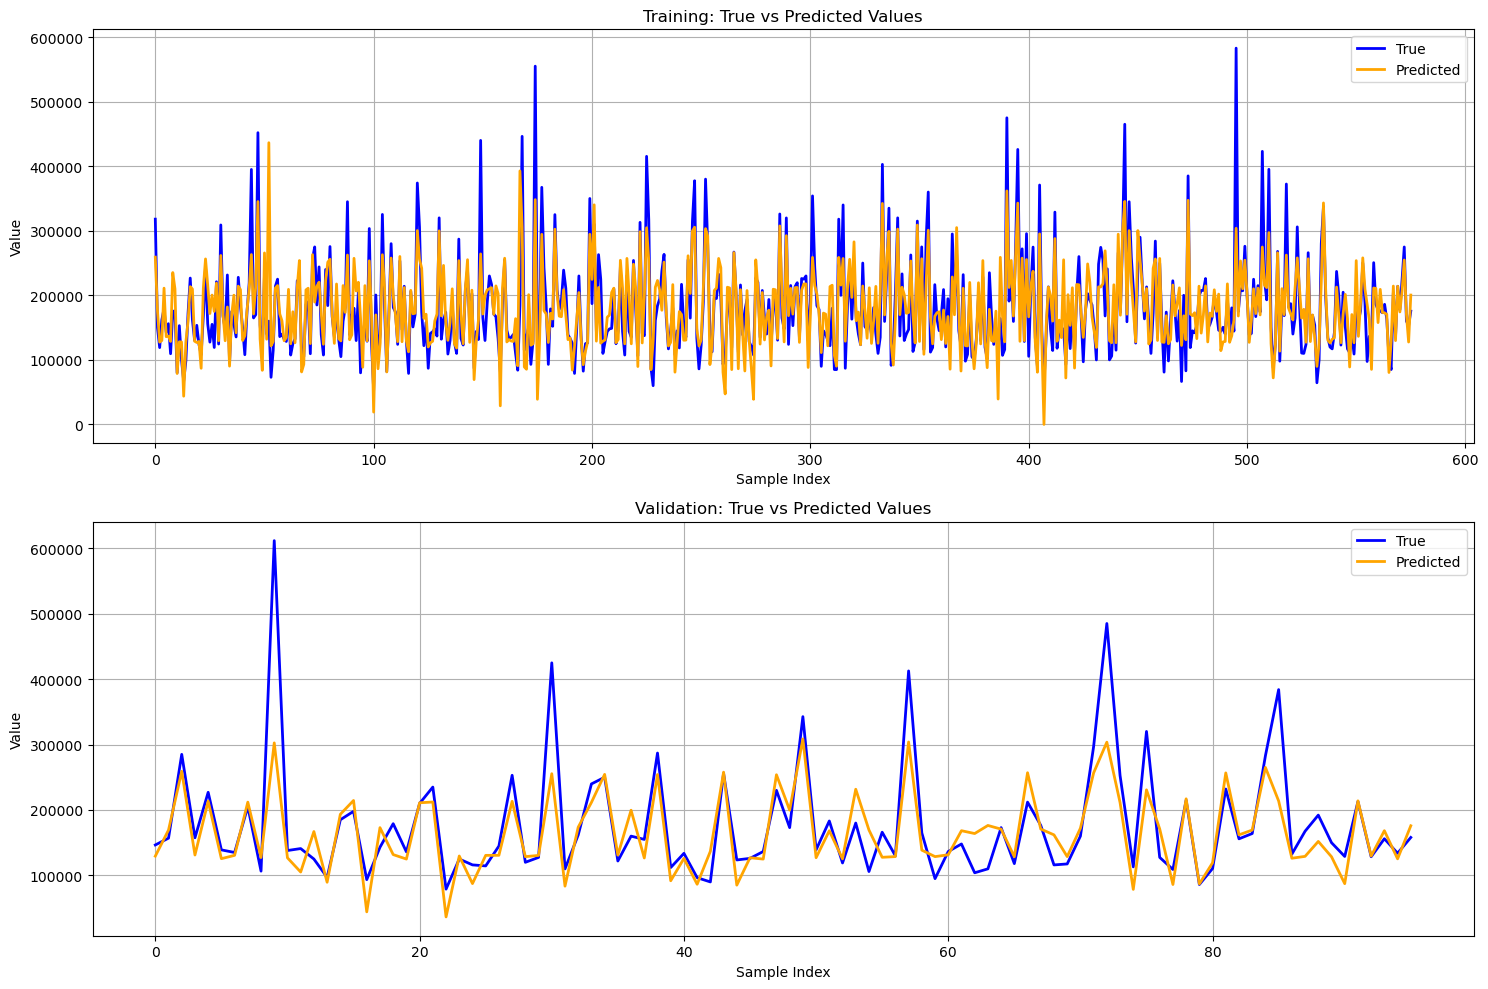

{'train': {'MAE': 29776.3479, 'MSE': 1838417170.8704, 'R2': 0.68},
 'val': {'MAE': 31062.0201, 'MSE': 2838104563.931, 'R2': 0.64}}

In [8]:
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

EPOCHS = 1000
LEARNING_RATE = 0.1
INPUT_SIZE = 8
HIDDEN_SIZE = 16
OUTPUT_SIZE = 1

model_raw = PriceModel(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE)


loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=model_raw.parameters(), lr=LEARNING_RATE)

pre_model = Model(model_raw)

engine = Engine(model=pre_model,
                random_seed=seed,
                train_dataloader=train_data,
                val_dataloader=val_data)
engine.train(loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=EPOCHS, 
             plot_resolution=10)

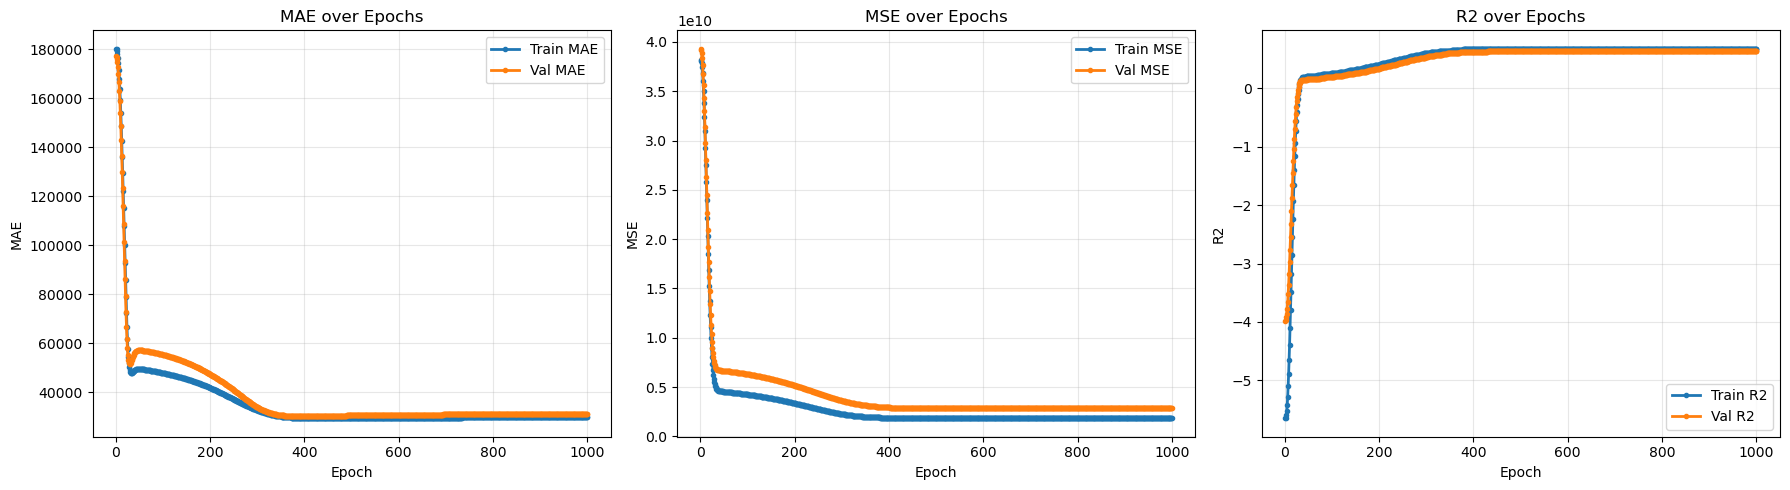

In [8]:
engine.plot_metrics()